In [103]:
# Import libraries
import pandas as pd

# Load dataset
df = pd.read_csv('C:/Users/Andre/Stress Detection Dataset - stress_detection.csv')

# Checks first few rows of the dataset
df.head()


,participant_id,day,PSS_score,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,sleep_time,wake_time,sleep_duration,PSQI_score,call_duration,num_calls,num_sms,screen_on_time,skin_conductance,accelerometer,mobility_radius,mobility_distance
0,1,1,34,2.322732,4.332193,1.185878,1.570213,3.782094,7.726792,5.190660,6.572069,1,3.924527,12,32,10.703714,3.115730,0.161717,1.145179,2.196851
1,1,2,37,1.761436,3.254120,3.907281,4.072512,1.997145,7.312674,6.170717,8.030168,4,58.318004,3,41,11.012939,0.959144,0.985587,1.021133,0.737825
2,1,3,30,3.025887,1.855002,2.045900,2.317493,3.619225,6.992060,5.318825,7.102420,1,4.941043,4,48,4.877372,3.311629,1.877445,0.478179,0.911673
3,1,4,16,1.948370,4.966676,3.345225,1.607756,3.583524,8.886914,8.061075,8.123294,3,0.295373,11,38,3.462956,0.625721,0.494921,0.630549,3.911418
4,1,5,32,3.343484,2.065936,3.137843,2.118061,2.567347,7.811705,7.312145,7.785143,3,22.300571,17,17,4.861046,0.622609,1.342600,0.254090,1.605132


In [104]:
# Checks missing values
df.isnull().sum()

participant_id       0
day                  0
PSS_score            0
Openness             0
Conscientiousness    0
Extraversion         0
Agreeableness        0
Neuroticism          0
sleep_time           0
wake_time            0
sleep_duration       0
PSQI_score           0
call_duration        0
num_calls            0
num_sms              0
screen_on_time       0
skin_conductance     0
accelerometer        0
mobility_radius      0
mobility_distance    0
dtype: int64

In [105]:
# Drop rows with missing values
df.dropna(inplace=True)

# Or, impute missing values with the column mean
df.fillna(df.mean(), inplace=True)

In [106]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [107]:
# Check data types
df.dtypes

# Convert columns to the appropriate data type (if needed)
df['PSS_score'] = df['PSS_score'].astype(float)

In [108]:
# Example: Convert sleep_time and wake_time to time format
df['sleep_time'] = pd.to_datetime(df['sleep_time'])
df['wake_time'] = pd.to_datetime(df['wake_time'])

# Calculate sleep duration
df['calculated_sleep_duration'] = (df['wake_time'] - df['sleep_time']).dt.total_seconds() / 3600  # hours

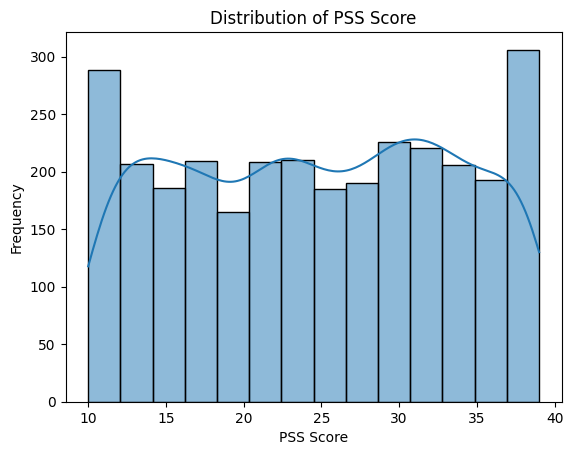

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

#Plot distribution of PSS_score
sns.histplot(df['PSS_score'], kde=True)
plt.title('Distribution of PSS Score')
plt.xlabel('PSS Score')
plt.ylabel('Frequency')
plt.show()

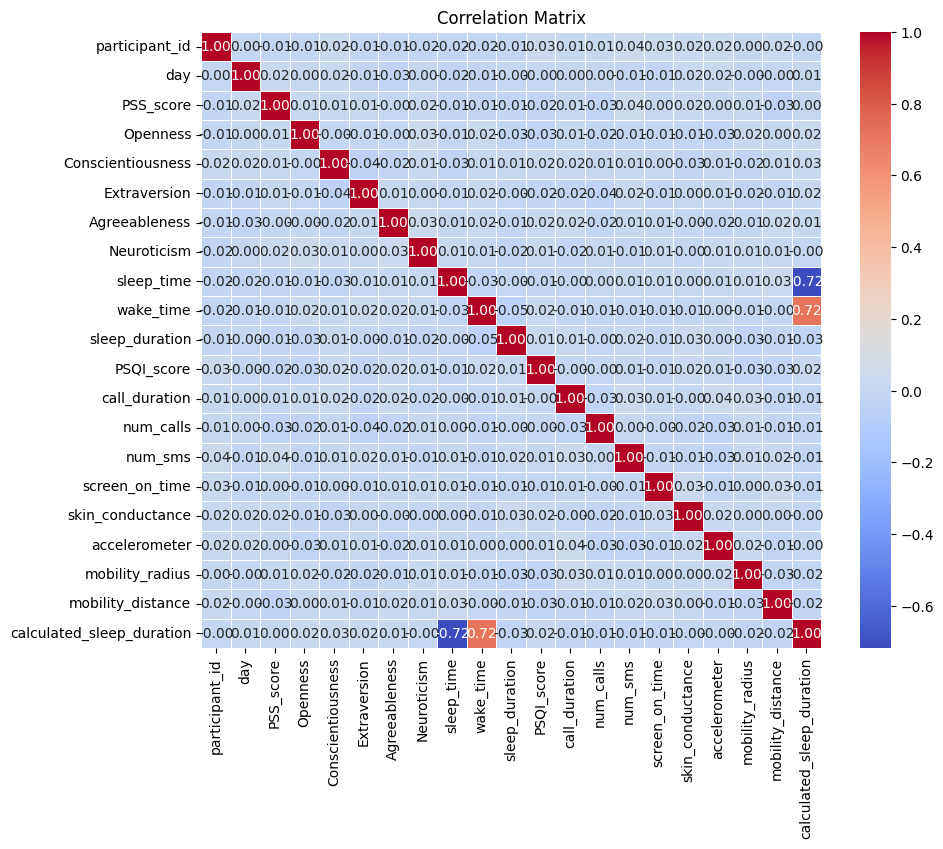

In [110]:
# Calculate correlation matrix
corr = df.corr()

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [111]:
# Calculate IQR for PSS_score
Q1 = df['PSS_score'].quantile(0.25)
Q3 = df['PSS_score'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for normal values
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset to not include outliers
df = df[(df['PSS_score'] >= lower_bound) & (df['PSS_score'] <= upper_bound)]

In [112]:
import numpy as np
import random
import time

# Generate random data
size = 10000  # Adjusted this size to test scalability
numpy_array1 = np.random.rand(size)
numpy_array2 = np.random.rand(size)

python_list1 = list(numpy_array1)
python_list2 = list(numpy_array2)

# Function to compute correlation manually for Python lists
def manual_correlation(x, y):
    n = len(x)
    mean_x = sum(x) / n
    mean_y = sum(y) / n
    cov = sum((x[i] - mean_x) * (y[i] - mean_y) for i in range(n))
    std_x = (sum((x[i] - mean_x) ** 2 for i in range(n)) ** 0.5)
    std_y = (sum((y[i] - mean_y) ** 2 for i in range(n)) ** 0.5)
    return cov / (std_x * std_y)

# Timing NumPy correlation
start_time = time.time()
numpy_corr = np.corrcoef(numpy_array1, numpy_array2)[0, 1]
numpy_time = time.time() - start_time

# Timing manual correlation with Python lists
start_time = time.time()
manual_corr = manual_correlation(python_list1, python_list2)
manual_time = time.time() - start_time

# Results
print(f"NumPy Correlation: {numpy_corr}, Time: {numpy_time:.6f} seconds")
print(f"Manual Correlation: {manual_corr}, Time: {manual_time:.6f} seconds")

NumPy Correlation: 0.0169031778395749, Time: 0.001005 seconds
Manual Correlation: 0.016903177839575057, Time: 0.008652 seconds


In [113]:
import heapq

# Generate random data
data = [random.randint(1, 10000) for _ in range(size)]
k = 10  # Number of top elements to retrieve

# Timing heap method
start_time = time.time()
top_k_heap = heapq.nlargest(k, data)
heap_time = time.time() - start_time

# Timing sort method
start_time = time.time()
top_k_sort = sorted(data, reverse=True)[:k]
sort_time = time.time() - start_time

# Print results in this formatting
print(f"Heap Top-{k}: {top_k_heap}, Time: {heap_time:.6f} seconds")
print(f"Sort Top-{k}: {top_k_sort}, Time: {sort_time:.6f} seconds")

Heap Top-10: [9999, 9999, 9998, 9998, 9996, 9995, 9994, 9992, 9991, 9989], Time: 0.000000 seconds
Sort Top-10: [9999, 9999, 9998, 9998, 9996, 9995, 9994, 9992, 9991, 9989], Time: 0.003702 seconds


In this analysis, I explored the relationship between sleep efficiency, screen-on time, and stress levels, using the PSS_score as the main result of stress. I performed the following steps:

Data Preprocessing:

I attempted to handle missing values, outliers, and ensured the consistency of data types.

Exploratory Data Analysis:

We visualized the distribution of PSS_score and the correlation matrix to explore relationships in the data.
Performance Comparison:

We compared the performance of NumPy arrays and heaps for two tasks:
Correlation Computation:
NumPy's built-in corrcoef function performed faster than manually computed correlations using Python lists.
Top-k Element Retrieval:
The heap-based method for retrieving the top-k elements (largest values) was more efficient than sorting the entire list, as it ran faster with larger datasets.

NumPy Array: This structure proved optimal for numerical computations and operations involving large datasets, such as correlation calculation. Its efficiency with array manipulations justifies its use in this analysis.

Heap: The heap structure was highly effective for priority-based operations like dynamically retrieving the top-k stress levels. The heap-based method outperformed sorting in terms of execution time, especially with larger datasets.

The combination of NumPy arrays and heaps allows for efficient data analysis in this context, particularly in tasks involving large datasets and real-time ranking. These data structures offer clear advantages in terms of performance, especially when scalability is a concern.

In [114]:
import numpy as np

# I had trouble finding the right key
# Next few cells are me troubleshooting multiple times...

# Assuming 'sleep_duration' is a valid column in dataframe
sleep_duration = np.array(df['sleep_duration'])

# Assuming 'screen_on_time' is a valid column in dataframe
screen_on_time = np.array(df['screen_on_time'])

# Assuming 'PSS_score' is a valid column in dataframe
pss_scores = np.array(df['PSS_score'])

# Now you can work with these NumPy arrays
print(sleep_duration[:5])  # Print the first 5 values of sleep_duration


[6.5720689  8.0301684  7.10241994 8.12329367 7.78514287]


In [115]:
import numpy as np

# Convert columns into NumPy arrays
pss_scores = np.array(df['PSS_score'])  # PSS scores
sleep_duration = np.array(df['sleep_duration'])  # Sleep duration
screen_on_time = np.array(df['screen_on_time'])  # Screen on time


In [116]:
# Check lengths to match
print(len(pss_scores), len(sleep_duration), len(screen_on_time))


3000 3000 3000


In [117]:
# Calculate correlation between sleep duration and PSS score
correlation = np.corrcoef(sleep_duration, pss_scores)[0, 1]
print(f"Correlation between sleep duration and PSS score: {correlation}")


Correlation between sleep duration and PSS score: -0.014899485704908467


In [118]:
# Calculate pairwise correlations
correlation_sleep_pss = np.corrcoef(sleep_duration, pss_scores)[0, 1]
correlation_screen_pss = np.corrcoef(screen_on_time, pss_scores)[0, 1]
correlation_sleep_screen = np.corrcoef(sleep_duration, screen_on_time)[0, 1]

print(f"Correlation between sleep duration and PSS score: {correlation_sleep_pss}")
print(f"Correlation between screen on time and PSS score: {correlation_screen_pss}")
print(f"Correlation between sleep duration and screen on time: {correlation_sleep_screen}")


Correlation between sleep duration and PSS score: -0.014899485704908467
Correlation between screen on time and PSS score: 0.004376872540594537
Correlation between sleep duration and screen on time: -0.006658611465802431


In [119]:
import heapq

# Find unique participant PSS score entries by putting together PSS scores with participant IDs
unique_participants = set(zip(df['PSS_score'], df['participant_id']))

# Find the top 10 participants with the highest stress levels (PSS scores)
top_10 = heapq.nlargest(10, unique_participants, key=lambda x: x[0])

# Display the top 10 participants
for participant in top_10:
    print(f"Participant ID: {participant[1]}, PSS Score: {participant[0]}")

Participant ID: 81, PSS Score: 39.0
Participant ID: 71, PSS Score: 39.0
Participant ID: 48, PSS Score: 39.0
Participant ID: 84, PSS Score: 39.0
Participant ID: 38, PSS Score: 39.0
Participant ID: 51, PSS Score: 39.0
Participant ID: 5, PSS Score: 39.0
Participant ID: 18, PSS Score: 39.0
Participant ID: 8, PSS Score: 39.0
Participant ID: 93, PSS Score: 39.0
